In [1]:
import math
import json
from collections import Counter
from math import *
from glob import glob
import os
import numpy as np
import pickle
from scipy import sparse
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


from dataclasses import dataclass


In [2]:
@dataclass
class Scores:        
    precision_micro: float
    precision_macro: float
        
    recall_micro: float
    recall_macro: float
    
    f1_micro: float
    f1_macro: float

In [3]:
def case(c):
    with open(f"{c}/train.pkl", "rb") as f:
        X_train = pickle.load(f)
    with open(f"{c}/test.pkl", "rb") as f:
        X_test = pickle.load(f)

    Y_train = json.load(open(f"{c}/train_groups.json"))
    Y_test = json.load(open(f"{c}/test_groups.json"))
    
    print(f"----{c}----\n")
    print(f"X_train.shape {X_train.shape}")
    print(f"X_test.shape {X_test.shape}")
    
    counter = Counter()
    counter.update(Y_train)
    counter.update(Y_test)
    print(counter.most_common())

    tuned_parameters = [{"C": [1, 10, 100, 1000, 2000]}]
        
    clf = GridSearchCV(
        LinearSVC(), 
        tuned_parameters, 
        cv=5,       
        scoring='f1_macro'
    )

    clf.fit(X_train, Y_train)
    print(clf.best_params_)

    Y_res = clf.predict(X_test)
    print(classification_report(Y_test, Y_res))
        
    return Scores(
        precision_micro=precision_score(Y_test, Y_res, average='micro'),
        precision_macro=precision_score(Y_test, Y_res, average='macro'),
            
        recall_micro=recall_score(Y_test, Y_res, average='micro'),
        recall_macro=recall_score(Y_test, Y_res, average='macro'),

        f1_micro=f1_score(Y_test, Y_res, average='micro'),
        f1_macro=f1_score(Y_test, Y_res, average='macro'),
    )

In [4]:
normal_scores = case("normal")
print(normal_scores)

----normal----

X_train.shape (27518, 83907)
X_test.shape (9176, 83907)
[('A?C.*', 18109), ('A?K.*', 7468), ('A?U.*', 6747), ('A?P.*', 1911), ('G.*', 1511), ('W.*', 838), ('Am.*', 94), ('R.*', 16)]


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-s

{'C': 1000}
             precision    recall  f1-score   support

      A?C.*       0.97      0.99      0.98      4528
      A?K.*       0.99      0.99      0.99      1867
      A?P.*       0.97      0.96      0.96       478
      A?U.*       1.00      1.00      1.00      1687
       Am.*       0.93      0.58      0.72        24
        G.*       0.87      0.76      0.81       378
        R.*       1.00      0.50      0.67         4
        W.*       0.99      0.94      0.97       210

avg / total       0.98      0.98      0.98      9176

Scores(precision_micro=0.9776591107236269, precision_macro=0.9654111897165458, recall_micro=0.9776591107236269, recall_macro=0.8403843534417088, f1_micro=0.9776591107236269, f1_macro=0.8868637211412562)


In [5]:
lemmatised_scores = case("lemmatised")
print(lemmatised_scores)

----lemmatised----

X_train.shape (27518, 26780)
X_test.shape (9176, 26780)
[('A?C.*', 18109), ('A?K.*', 7468), ('A?U.*', 6747), ('A?P.*', 1911), ('G.*', 1511), ('W.*', 838), ('Am.*', 94), ('R.*', 16)]


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-s

{'C': 2000}
             precision    recall  f1-score   support

      A?C.*       0.98      0.98      0.98      4528
      A?K.*       0.99      0.99      0.99      1867
      A?P.*       0.97      0.96      0.96       478
      A?U.*       1.00      1.00      1.00      1687
       Am.*       0.91      0.83      0.87        24
        G.*       0.83      0.78      0.81       378
        R.*       1.00      0.50      0.67         4
        W.*       0.97      0.95      0.96       210

avg / total       0.98      0.98      0.98      9176

Scores(precision_micro=0.9770052310374892, precision_macro=0.955239463868291, recall_micro=0.9770052310374892, recall_macro=0.8750407095541589, f1_micro=0.9770052310374892, f1_macro=0.9044193580815469)


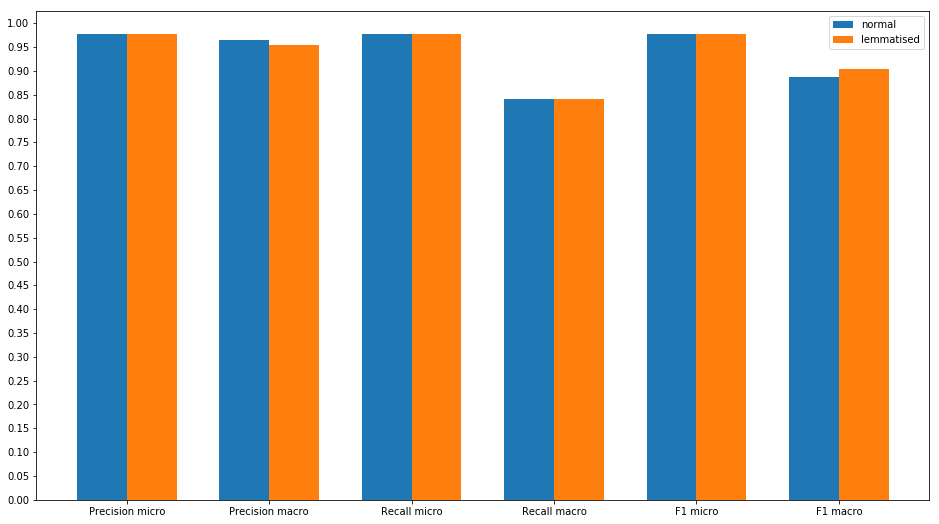

In [6]:
normal = (
    normal_scores.precision_micro, 
    normal_scores.precision_macro, 
    normal_scores.recall_micro,
    normal_scores.recall_macro,
    normal_scores.f1_micro,
    normal_scores.f1_macro,
)
          
lemmatised = (

    lemmatised_scores.precision_micro, 
    lemmatised_scores.precision_macro, 
    lemmatised_scores.recall_micro,
    normal_scores.recall_macro,
    lemmatised_scores.f1_micro,
    lemmatised_scores.f1_macro,
)

ind = np.arange(len(normal)) 
width = 0.35       
plt.figure(figsize=(16, 9))
plt.bar(ind, normal, width, label='normal')
plt.bar(ind + width, lemmatised, width, label='lemmatised')

plt.xticks(
    ind + width / 2, 
    (
        'Precision micro', 
        'Precision macro', 
        'Recall micro', 
        'Recall macro', 
        'F1 micro',
        'F1 macro'
    )
)
plt.yticks([x/20 for x in range(21)])

plt.legend(loc='best')
plt.show()